In [37]:
"""
Ta analiza prikazuje povezavo med številom epizod in povprečno oceno animejev. 
Za vsako število epizod je izračunana povprečna ocena ter število animejev, ki spadajo v to kategorijo. 
Rezultati so predstavljeni v tabeli, ki omogoča pregled, kako se kakovost (ocena) spreminja glede na dolžino serije.
"""
import csv
import pandas as pd
from IPython.display import display

encoding = 'utf-8'
with open(file="anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    podatki = {}
    podatki_average = {}
    anime_count = {}

    for i, line in enumerate(reader):
        if i == 0:
            continue
        
        ocena = line[1]
        stevilo_ep = line[6]

        if stevilo_ep == '':
            continue

        if stevilo_ep not in podatki.keys():
            podatki[stevilo_ep] = [ocena]
        else:
            podatki[stevilo_ep].append(ocena)

    for key in podatki.keys():
        ocene = podatki[key]
        ocene_float = [float(o) for o in ocene] # Spremenimo iz string to float
        podatki_average[key] = round(sum(ocene_float) / len(ocene_float), 2)
        anime_count[key] = len(ocene_float)

# Risanje tabele:
podatki_average = {k: v for k, v in sorted(podatki_average.items(), key=lambda item: int(item[0]))}

list_podatki_average = list(podatki_average.items())
for i, key in enumerate(podatki_average.keys()):
    list_podatki_average[i] = list_podatki_average[i] + (anime_count[key], )
table = pd.DataFrame(list_podatki_average, columns=["Število epizod", "Povprečna ocena", "Št. animejev"])
display(
    table.head(25)
         .style
         .hide(axis="index") # Skrije vrstico, ki oštevilči tableo.
         .format({"Povprečna ocena": "{:.2f}"})
)


Število epizod,Povprečna ocena,Št. animejev
1,7.34,1923
2,7.30,218
3,7.28,138
4,7.30,116
5,7.28,46
6,7.29,104
7,7.31,34
8,7.40,44
9,7.22,19
10,7.49,82


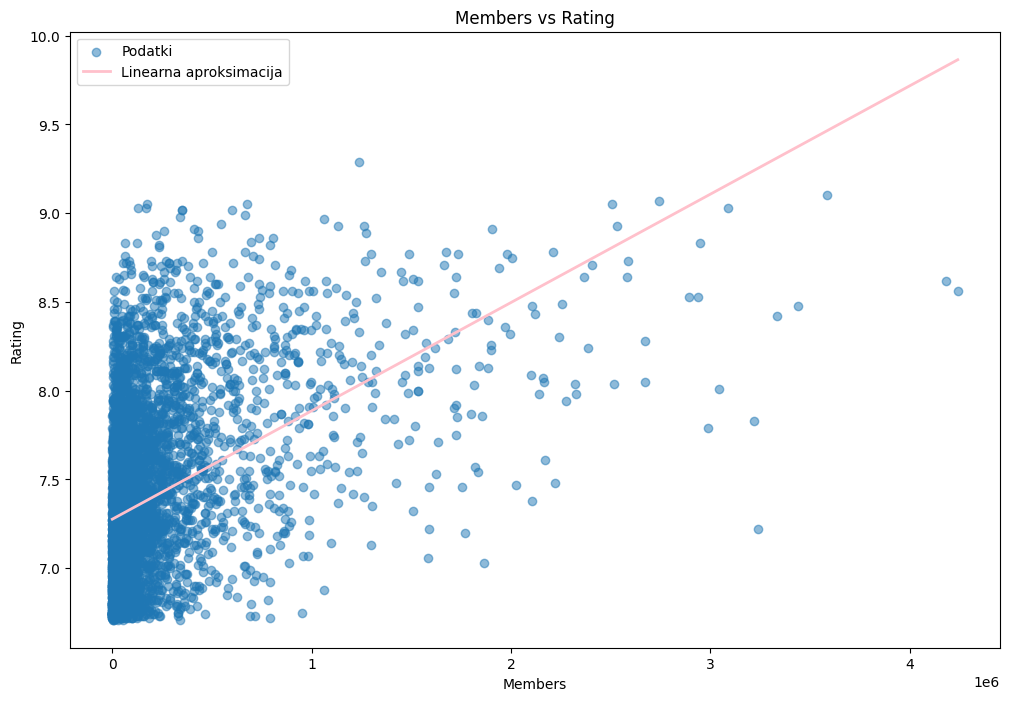

In [38]:
"""
Ta analiza preučuje povezavo med številom članov (gledalcev, ki imajo anime dodan v svojo listo) in povprečno oceno animeja. 
Rezultati so prikazani s točkovnim diagramom, kjer vsaka pika predstavlja posamezen anime. 
Dodana je tudi linearna aproksimacija, ki potrjuje hipotezo, da imajo animeji z višjo oceno praviloma več članov oziroma večjo priljubljenost.
"""

import csv
import matplotlib.pyplot as plt
import numpy as np

encoding = 'utf-8'

members = []
scores = []

with open("anime_data_premium.csv", "r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    for i, line in enumerate(reader):
        if i == 0:
            continue 
        try:
            score = float(line[1])
            n_members = int(line[19].replace(",", ""))
        except ValueError:
            continue
        members.append(n_members)
        scores.append(score)

members = np.array(members)
scores = np.array(scores)

plt.figure(figsize=(12, 8))
plt.scatter(members, scores, alpha=0.5, label="Podatki")


#RISANJE LINEARNE APROKSIMACIJE
a, b = np.polyfit(members, scores, 1)
x_fit = np.linspace(members.min(), members.max(), 2)
y_fit = a * x_fit + b
plt.plot(x_fit, y_fit, color="pink", linewidth=2, label="Linearna aproksimacija")

#Risanje grafa
plt.xlabel("Members")
plt.ylabel("Rating")
plt.title("Members vs Rating")
plt.legend()

plt.show()


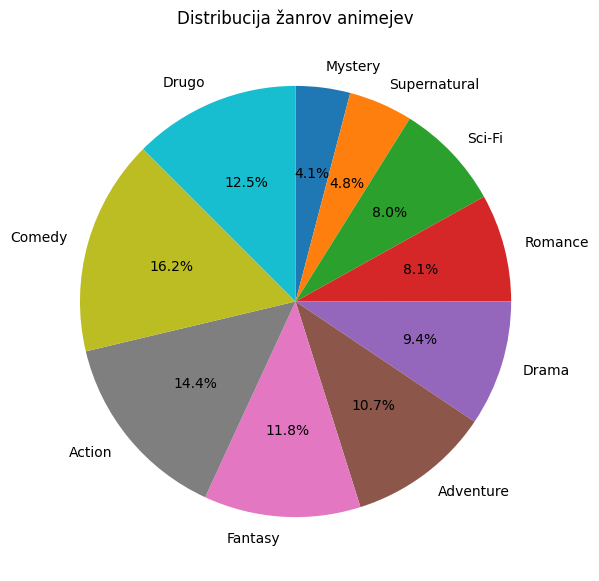

In [39]:
"""
Ta analiza prikazuje porazdelitev animejev glede na žanre. 
S pomočjo tortnega diagrama so žanri razvrščeni glede na delež vseh obravnavanih animejev. 
Manj pogosti žanri so združeni v kategorijo »Drugo«, kar omogoča boljši pregled glavnih skupin. 
Rezultati pokažejo, kateri žanri prevladujejo v bazi podatkov ter kakšen delež zavzemajo v primerjavi z drugimi.
"""
import csv
import matplotlib.pyplot as plt

encoding = "utf-8"

zanra_stevilo = {}

with open("anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    for i, line in enumerate(reader):
        if i == 0:
            continue

        genres = line[14]   # npr. "Action, Drama, Suspense"
        genres = genres.strip("[]")


        # Razdelimo v individualne žanre
        for g in genres.split(", "):
            if g.strip() == "" or g == "N/A":
                continue

            g = g.strip("'") # Da bo lepo :)

            if g not in zanra_stevilo.keys():
                zanra_stevilo[g] = 1
            else:
                zanra_stevilo[g] += 1


# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
zanra_stevilo = {k: v for k, v in sorted(zanra_stevilo.items(), key=lambda item: item[1])}
meja = 4  # prag v %

labels = []
vrednosti = []

sum_vrednosti = sum(zanra_stevilo.values())
others_vrednost = 0

for label, value in zanra_stevilo.items():
    procent = 100 * value / sum_vrednosti
    if procent >= meja:
        labels.append(label)
        vrednosti.append(value)
    else:
        others_vrednost += value

# Dodamo "Others" samo, če je potrebno
if others_vrednost > 0:
    labels.append("Drugo")
    vrednosti.append(others_vrednost)


# Risanje pite
plt.figure(figsize=(7,7)) # Popravimo velikost torte
plt.pie(
    vrednosti,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title("Distribucija žanrov animejev")
plt.show()

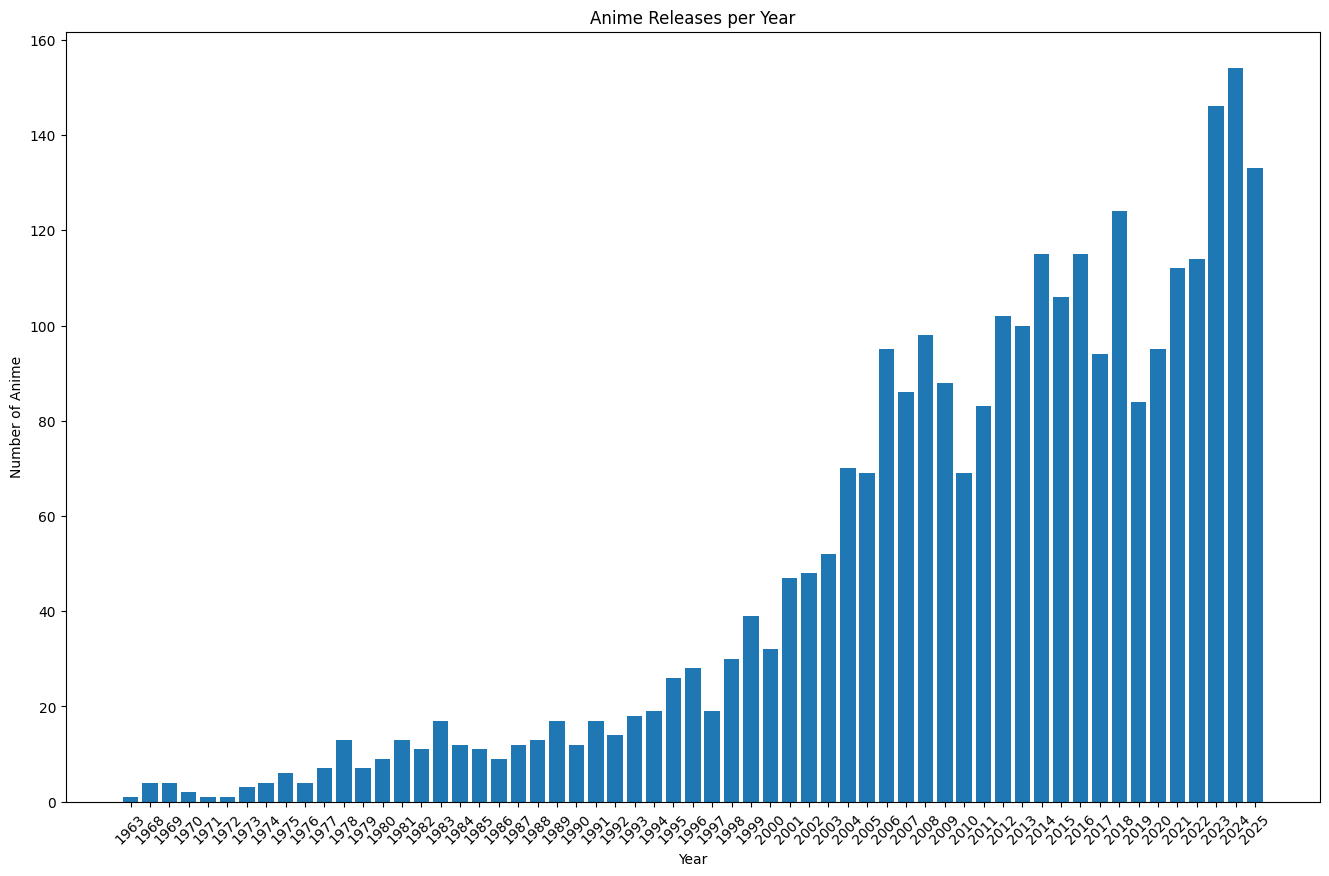

In [40]:
"""
Ta analiza prikazuje število izdanih animejev po letih. 
Podatki so izluščeni iz stolpca, ki vsebuje informacije o premieri, nato pa so razvrščeni glede na leto izdaje. 
Rezultati so prikazani s stolpičnim diagramom, ki omogoča enostaven pregled trendov skozi čas. 
Na ta način lahko opazujemo obdobja, ko je produkcija animejev naraščala ali upadala, ter ugotovimo, v katerih letih je izšlo največ naslovov.
"""
import csv, re
import matplotlib.pyplot as plt

encoding = 'utf-8'

with open(file="anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    leta = {}
    for i, line in enumerate(reader):
        if i == 0:
            continue
        
        podatek = line[10]
        leto = re.search(r"\b(\d{4})\b", podatek)
        if leto:
            leto = leto.group(1)

        if leto == 'N/A' or leto == None:
            continue

        if leto not in leta.keys():
            leta[leto] = 1
        else:
            leta[leto] += 1
            
# Razporedimo leta naraščajoče
years = sorted(leta.keys(), key=int)
counts = [leta[y] for y in years]

plt.figure(figsize=(16.18, 10))
plt.bar(years, counts)
plt.xlabel("Year")
plt.ylabel("Number of Anime")
plt.title("Anime Releases per Year")
plt.xticks(rotation=45)  # Da se ne prekrivajo
plt.show()

In [ ]:
"""
Ta analiza se osredotoča na demografsko ciljno skupino animejev, kot so npr. *Shounen*, *Shoujo*, *Seinen* ali *Josei*. 
Shounen => young male audience   
V kodi se prešteje pojavnost posamezne demografike in izračuna, katera skupina ima največ naslovov. 
Rezultat poda enostaven pregled nad tem, kateri tip občinstva je v obravnavani bazi podatkov najpogosteje ciljan.
"""
import csv
encoding = 'utf-8'

with open(file="anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    demografike = {}
    for i, line in enumerate(reader):
        if i == 0:
            continue 
        
        demografika = line[15]
        if demografika == 'N/A' or demografika == None:
            continue

        if demografika not in demografike.keys():
            demografike[demografika] = 1
        else:
            demografike[demografika] += 1

najbolj_priljubljena = max(demografike, key=demografike.get)
stevilo = demografike[najbolj_priljubljena]
print(f'Najbolj ciljna demografika je "{najbolj_priljubljena}" z {stevilo} animejev.')

Najbolj ciljna demografika je "Shounen" z 1299 animejev.


In [42]:
"""
Ta analiza preučuje priljubljenost studiev glede na število članov (gledalcev), ki spremljajo njihove animeje. 
Za vsak studio se sešteje število članov vseh njegovih naslovov, nato pa se določi studio z največjo skupno priljubljenostjo. 
Rezultat jasno pokaže, kateri studio ima največji doseg med občinstvom in s tem velja za najbolj popularnega v bazi podatkov.
"""
import csv

encoding = 'utf-8'

dic_studiji = {}

with open("anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    for i, line in enumerate(reader):
        if i == 0:
            continue

        members = int(line[19].replace(",", ""))
        studios = line[12].split(",")

        if members == 'N/A' or members == '':
            continue

        members = int(members)

        for studio in studios:
            studio = studio.strip()
            if not studio or studio == "N/A":
                continue
            dic_studiji[studio] = dic_studiji.get(studio, 0) + members

# Najdemo studio z največ članov
max_memb = 0
popularni_studio = ""
for key in dic_studiji.keys():
    if max_memb < dic_studiji[key]:
        max_memb = dic_studiji[key]
        popularni_studio = key

print(f"Najbolj popularen studio je: {popularni_studio} z {max_memb} članov animejev.")


Najbolj popularen studio je: A-1 Pictures z 62520940 članov animejev.


In [43]:
"""
Ta analiza ocenjuje kakovost studiev na podlagi povprečne ocene njihovih animejev. 
Za vsak studio se zberejo vse ocene pripadajočih naslovov in izračuna povprečje. 
Na koncu se določi studio z najvišjo povprečno oceno, kar omogoča vpogled v to, kateri ustvarjalec animejev dosega najvišjo kakovost produkcije po mnenju gledalcev.
"""
import csv

encoding = 'utf-8'

dic = {}

with open("anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    for i, line in enumerate(reader):
        if i == 0:
            continue  

        try:
            score = float(line[1])
        except ValueError:
            continue

        studios = line[12].split(",")

        for studio in studios:
            studio = studio.strip()
            if not studio or studio == "N/A":
                continue

            if studio not in dic:
                dic[studio] = [score]
            else:
                dic[studio].append(score)

dic_avg = {studio: sum(scores) / len(scores) for studio, scores in dic.items()}

max_score = 0
for studio in dic_avg.keys():
    if max_score < dic_avg[studio]:
        max_score = dic_avg[studio]
        best_studio = studio

print(f"Po povprečni oceni je najboljši studio {best_studio}, z oceno {max_score}.")

Po povprečni oceni je najboljši studio Pierrot Films, z oceno 8.67.


In [44]:
"""
Ta analiza prikazuje razporeditev izdanih animejev po letnih časih. 
Iz podatkov o premieri so izluščeni letni časi (pomlad, poletje, jesen, zima), nato pa je za vsakega prešteto število novih naslovov. 
Rezultat omogoča primerjavo med letnimi časi in razkriva, v katerem delu leta izide največ animejev.
"""
import csv, re

encoding = 'utf-8'

dic = {}

with open("anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    for i, line in enumerate(reader):
        if i == 0:
            continue  # preskoči prvega

        sezona_podatek = line[10]
        sezona_search = re.search(r"(.*)\d{4}", sezona_podatek)
        if sezona_search:
            najdena_sezona = sezona_search.group(1)
        else:
            continue

        if najdena_sezona not in dic.keys():
           dic[najdena_sezona] = 1
        else:
            dic[najdena_sezona] += 1

for season in dic.keys():
    if season == "Fall ":
        print(f"Jeseni je izšlo {dic[season]} animejev.")
    elif season == "Spring ":
        print(f"Spomladi je izšlo {dic[season]} animejev.")
    elif season == "Winter ":
        print(f"Pozimi je izšlo {dic[season]} animejev.")
    elif season == "Summer ":
        print(f"Poleti je izšlo {dic[season]} animejev.")


Jeseni je izšlo 867 animejev.
Spomladi je izšlo 884 animejev.
Pozimi je izšlo 565 animejev.
Poleti je izšlo 518 animejev.


In [45]:
"""
Ta analiza omogoča iskanje vseh animejev, ki jih je ustvaril določen studio. 
Uporabnik vnese ime studia (npr. *Wit Studio*), nato pa se iz podatkov izpiše seznam vseh pripadajočih naslovov. 
Rezultat je enostaven način za pridobitev pregleda nad delom posameznega studia.
"""
import csv

encoding = 'utf-8'

# Madhouse, Bones, Wit Studio, ...
iskani_studio = "Wit Studio"
najdeni_animeji = []

with open("anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    for i, line in enumerate(reader):
        if i == 0:
            continue  
        
        studio = line[12]

        if studio == iskani_studio:
            najdeni_animeji.append(line[2])

if len(najdeni_animeji) == 0:
    print(f"Studio {iskani_studio} ne obstaja, ali pa ni v bazi podatkov.")

else:
    print(f"{iskani_studio} je naredil naslednje animeje:")
    for index, anime in enumerate(najdeni_animeji, start = 1):
        print(f"{index}. {anime}")

Wit Studio je naredil naslednje animeje:
1. Shingeki no Kyojin Season 3 Part 2
2. Vinland Saga
3. Shingeki no Kyojin Season 3
4. Shingeki no Kyojin
5. Shingeki no Kyojin Season 2
6. Ousama Ranking
7. Shingeki no Kyojin: Kuinaki Sentaku
8. Vivy: Fluorite Eye&#039;s Song
9. Great Pretender
10. Mahoutsukai no Yome: Hoshi Matsu Hito
11. Mahoutsukai no Yome
12. Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa
13. My Melody &amp; Kuromi
14. Shingeki no Kyojin Season 2 Movie: Kakusei no Houkou
15. Shingeki no Kyojin OVA
16. Shingeki no Kyojin Movie 1: Guren no Yumiya
17. Shingeki no Kyojin: Lost Girls
18. Shingeki no Kyojin: Chronicle
19. Hoozuki no Reitetsu
20. Koutetsujou no Kabaneri Movie 3: Unato Kessen
21. Owari no Seraph: Nagoya Kessen-hen
22. COLORs
23. Koutetsujou no Kabaneri Movie 1: Tsudou Hikari
24. Koutetsujou no Kabaneri Movie 2: Moeru Inochi
25. Totsukuni no Shoujo
26. Totsukuni no Shoujo (2022)
27. Donten ni Warau Gaiden: Shukumei, Soutou no Fuuma
28. Owari no Seraph
29. Koi wa Ame

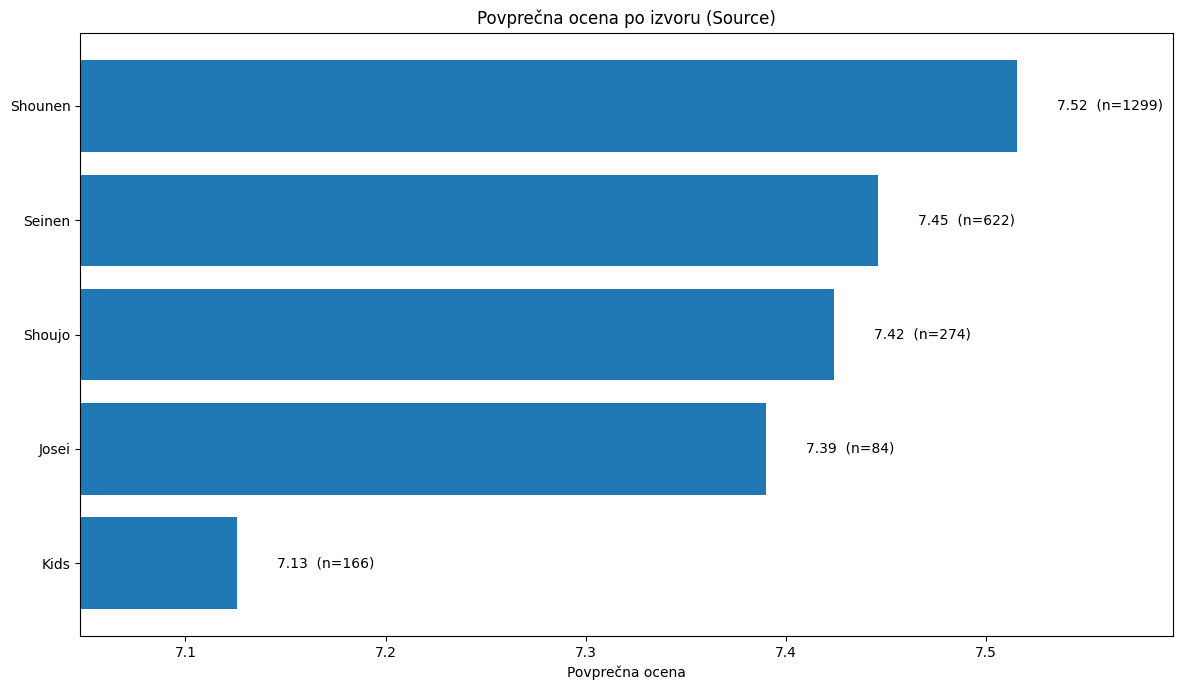

In [46]:
"""
Ta analiza primerja povprečne ocene animejev glede na njihov izvor (*source*), kot so npr. manga, lahki roman, vizualni roman ali izvirna produkcija. 
Za vsak izvor se izračuna povprečna ocena in število naslovov, nato pa so rezultati prikazani s stolpčnim diagramom. 
Na ta način lahko vidimo, kateri viri zgodbe so pri gledalcih ocenjeni najbolje ter kako pogosti so v bazi podatkov.
"""
import csv
import matplotlib.pyplot as plt

encoding = "utf-8"

scores_by_source = {}

with open("anime_data_premium.csv", mode="r", encoding=encoding) as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0:
            continue 

        source = row[15].strip()
        score_str = row[1].strip()

        if not source or source == "N/A":
            continue
        try:
            score = float(score_str)
        except ValueError:
            continue

        scores_by_source.setdefault(source, []).append(score)

# Izračun povprečij in števila
avg_by_source = {s: sum(v)/len(v) for s, v in scores_by_source.items()}
count_by_source = {s: len(v) for s, v in scores_by_source.items()}

# Razvrsti po povprečni oceni (padajoče)
sorted_sources = sorted(avg_by_source.items(), key=lambda x: x[1], reverse=True)

labels = [s for s, _ in sorted_sources]
avgs   = [avg_by_source[s] for s in labels]
counts = [count_by_source[s] for s in labels]

plt.figure(figsize=(12, 7))
plt.barh(labels, avgs)
plt.gca().invert_yaxis()
for y, (avg, n) in enumerate(zip(avgs, counts)):
    plt.text(avg + 0.02, y, f"{avg:.2f}  (n={n})", va="center")

min_avg = min(avgs)
max_avg = max(avgs)
dif_avg = max_avg - min_avg
padding = dif_avg * 0.2

plt.xlim(min_avg - padding, max_avg + padding)

plt.xlabel("Povprečna ocena")
plt.title("Povprečna ocena po izvoru (Source)")
plt.tight_layout()
plt.show()


In [47]:
"""
Ta analiza se osredotoča na starostne oznake (*age rating*), ki določajo primernost animejev za različne starostne skupine (npr. PG-13, R-17+). 
V kodi se prešteje, kolikokrat se posamezna oznaka pojavi v podatkih, nato pa se določi najpogostejša. 
Rezultat pokaže, katera starostna kategorija prevladuje v bazi in tako razkriva, za kakšno občinstvo je večina animejev namenjena.
"""
import csv

encoding = "utf-8"
ratings = {}

with open("anime_data_premium.csv", "r", encoding=encoding) as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0:
            continue
        rating = row[17].strip()
        if rating == "N/A" or rating == "":
            continue
        ratings[rating] = ratings.get(rating, 0) + 1

naj_rating = max(ratings, key=ratings.get)
print(f"Najpogostejša starostna oznaka je '{naj_rating}' z {ratings[naj_rating]} animeji.")


Najpogostejša starostna oznaka je 'PG-13 - Teens 13 or older' z 3938 animeji.


In [48]:
"""
Ta analiza išče anime z največjim številom epizod v podatkovni zbirki. 
Program pregleda stolpec s številom epizod in si zapomni najvišjo vrednost ter pripadajoče ime animeja. 
Rezultat poda naslov najdaljšega animeja in skupno število njegovih epizod, kar omogoča vpogled v najobsežnejše serije v bazi.
"""
import csv

encoding = "utf-8"
max_ep = 0
anime_name = ""

with open("anime_data_premium.csv", "r", encoding=encoding) as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0:
            continue
        try:
            ep = int(row[6])
        except ValueError:
            continue
        if ep > max_ep:
            max_ep = ep
            anime_name = row[2]

print(f"Anime z največ epizodami je '{anime_name}' z {max_ep} epizodami.")


Anime z največ epizodami je 'Doraemon (1979)' z 1787 epizodami.
